<a href="https://colab.research.google.com/github/kskaran94/VisualSimilarity/blob/master/Data_Subsetting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this script we are subsetting the data and resizing the images. Filtering is based on the number of pictures per personality/celebrity. Also we divide our data into train and validation splits.

In [1]:
import numpy as np

import random
import matplotlib.patheffects as PathEffects
%tensorflow_version 2.x
import os
import pickle
import pandas as pd
import seaborn as sns
import shutil
import matplotlib.pyplot as plt
from PIL import Image


TensorFlow 2.x selected.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cp gdrive/My\ Drive/lfw-dataset.zip .

In [0]:
%%capture
!unzip lfw-dataset.zip

In [5]:
df_people = pd.read_csv("people.csv")
df_people_sub = df_people[df_people['images'] > 10]
df_people_sub.reset_index(drop=True)

,name,images
0,Ann_Veneman,11.0
1,Edmund_Stoiber,13.0
2,Gordon_Brown,13.0
3,Gray_Davis,26.0
4,Hugo_Chavez,71.0
...,...,...
138,John_Ashcroft,53.0
139,John_Bolton,17.0
140,Michael_Bloomberg,20.0
141,Michael_Jackson,12.0


Removing folders with fewer than 10 images

In [0]:
path = "/content/lfw-deepfunneled/lfw-deepfunneled/"
full_celeb_list = set(os.listdir(path))
subset_celeb_list = set(df_people_sub['name'].to_list())

for folder in (full_celeb_list.difference(subset_celeb_list)):
  shutil.rmtree(path + folder)

Limiting 10 pictures per celebrity

In [0]:
for folder in subset_celeb_list:
  for file in os.listdir(path + folder):
    if int(file.split("_")[::-1][0].split('.')[0]) > 10:
      os.remove(path+folder+'/'+file)


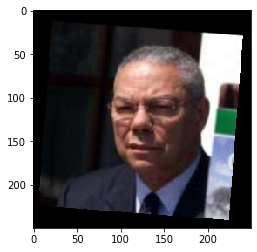

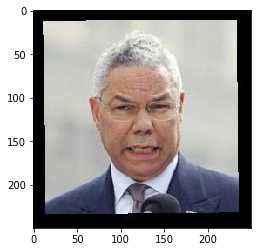

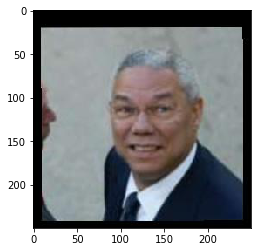

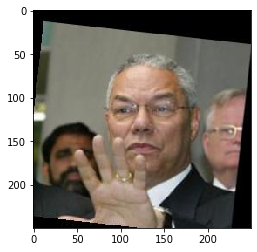

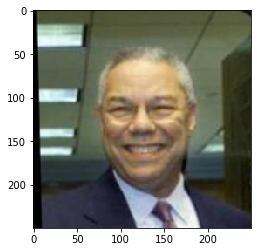

In [10]:


for image in os.listdir(path+folder)[:5]:
  pil_im = Image.open(path+folder+'/'+image) #Take jpg + png
  im_array = np.asarray(pil_im)
  plt.imshow(im_array)
  plt.show()

Resize all the images to 250,250

In [0]:
size = (250, 250)

for folder in subset_celeb_list:
  for files in os.listdir(path + folder):
    path_to_image = path + folder + '/' + files
    im = Image.open(path_to_image)
    im = im.resize(size)
    out_file = os.path.join(path+folder + '/', files)
    im.save(out_file, "JPEG")

In [13]:
shutil.make_archive('celeb', 'zip', "/content/lfw-deepfunneled/")

'/content/celeb.zip'